# Outliers

Often a data set will have a few points that are extreme outliers. It’s often better to simply remove these few points from the data set in order to have a more generalized model. Different methodoligies are used to treat outliers.


InterQuartile Range,

Standard Deviation,

Visualized or Domain Limit Value


In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [173]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [174]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<AxesSubplot:>

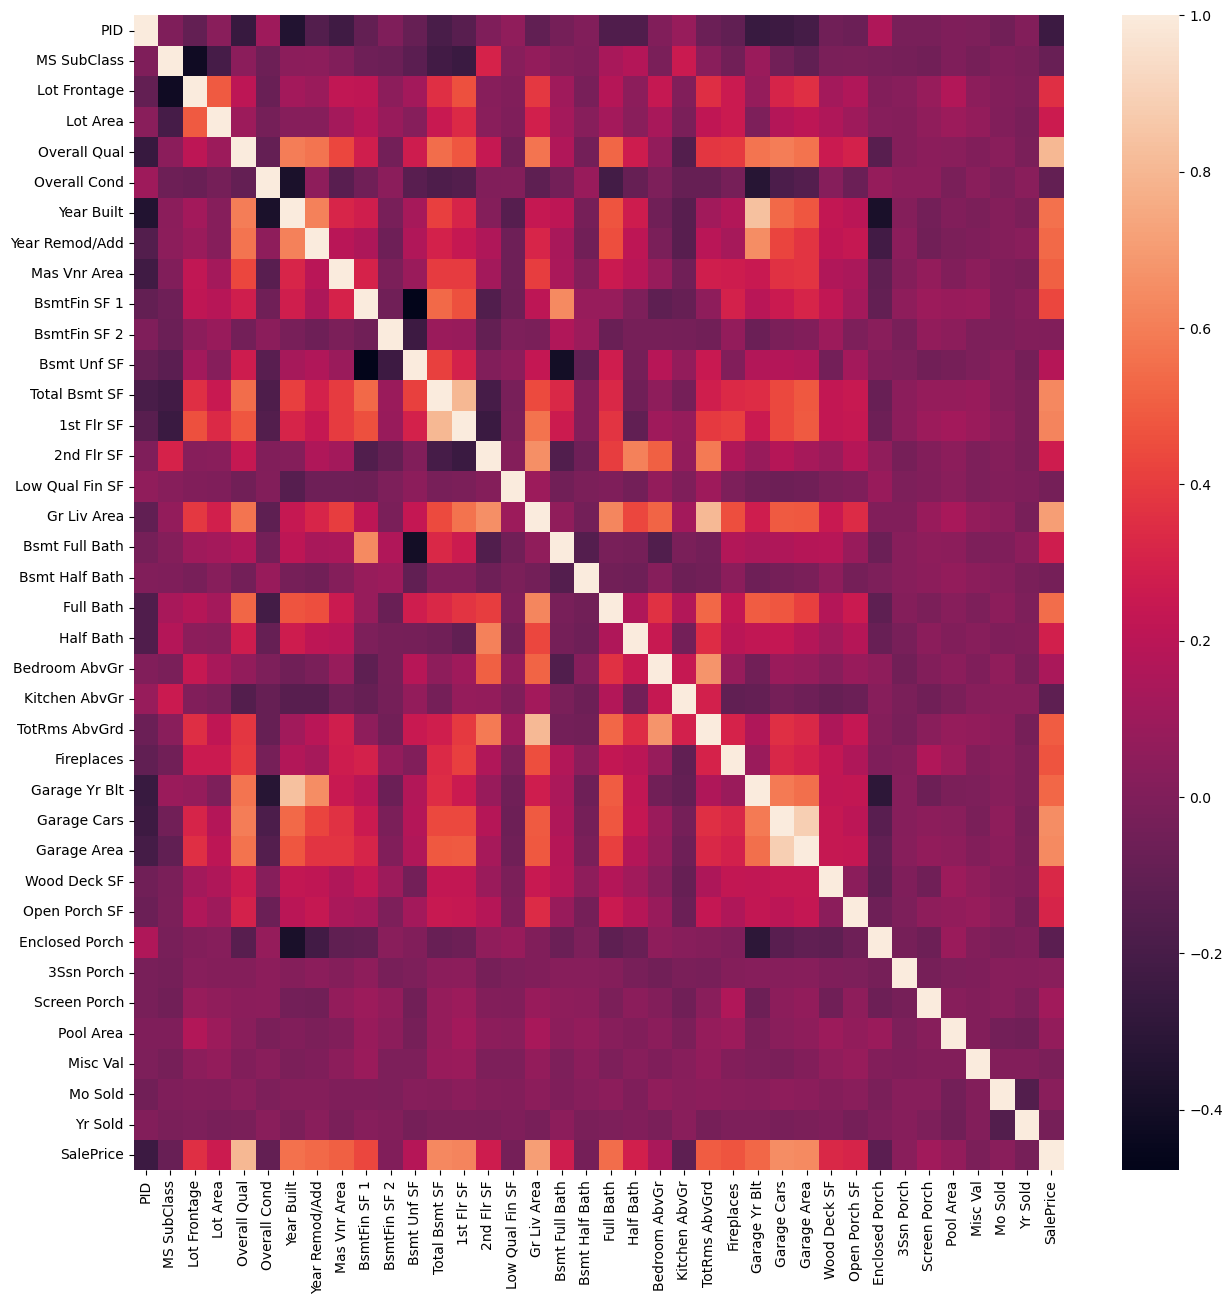

In [175]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr())

In [176]:
df['Overall Qual'].value_counts()

5     825
6     732
7     602
8     350
4     226
9     107
3      40
10     31
2      13
1       4
Name: Overall Qual, dtype: int64

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

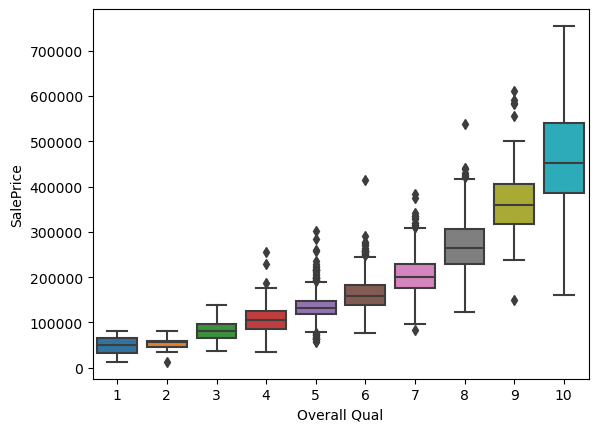

In [177]:
sns.boxplot(data = df, x = 'Overall Qual', y = 'SalePrice')

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

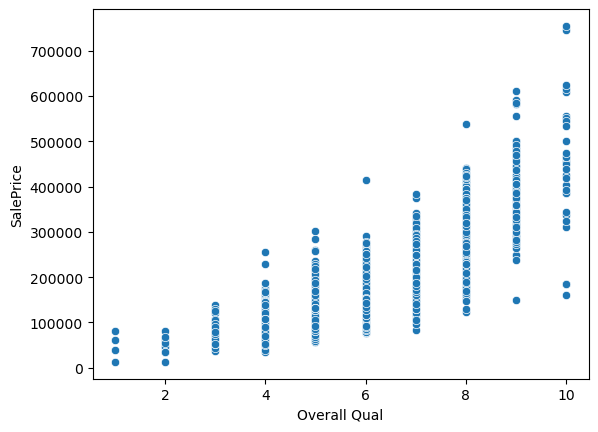

In [178]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

In [179]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [180]:
# Select the column to analyze
col_name = 'Overall Qual'
col_data = df[col_name]

# Calculate the first and third quartiles (Q1 and Q3)
q1 = col_data.quantile(0.25)
q3 = col_data.quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Define the outlier thresholds
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr

# Identify the outliers
outliers = (col_data < lower_threshold) | (col_data > upper_threshold)

df = df[~outliers]

# Print the results
print(f"{len(outliers[outliers==True])} outliers removed from {col_name}")

4 outliers removed from Overall Qual


In [168]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

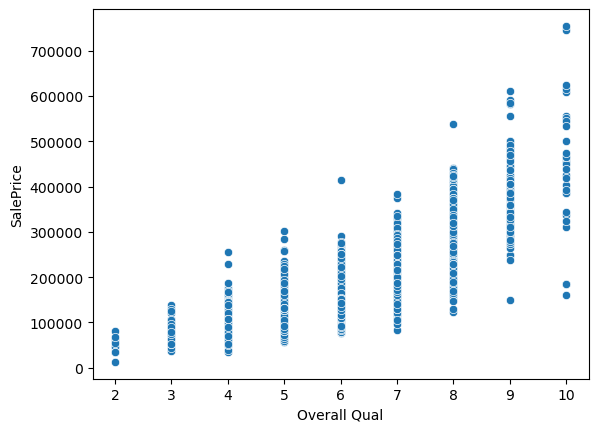

In [170]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

# Missing Values

In [181]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2926 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2926 non-null   int64  
 1   MS SubClass      2926 non-null   int64  
 2   MS Zoning        2926 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2926 non-null   int64  
 5   Street           2926 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2926 non-null   object 
 8   Land Contour     2926 non-null   object 
 9   Utilities        2926 non-null   object 
 10  Lot Config       2926 non-null   object 
 11  Land Slope       2926 non-null   object 
 12  Neighborhood     2926 non-null   object 
 13  Condition 1      2926 non-null   object 
 14  Condition 2      2926 non-null   object 
 15  Bldg Type        2926 non-null   object 
 16  House Style      2926 non-null   object 
 17  Overall Qual  

In [184]:
df.isnull().sum()

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      489
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [227]:
perc = 100 * df.isnull().sum() / len(df)
perc = perc.sort_values()
perc = perc[perc > 0 ] 
print(perc)
type(perc)

Electrical         0.034176
BsmtFin SF 1       0.034176
BsmtFin SF 2       0.034176
Bsmt Unf SF        0.034176
Total Bsmt SF      0.034176
Garage Area        0.034176
Garage Cars        0.034176
Bsmt Full Bath     0.068353
Bsmt Half Bath     0.068353
Mas Vnr Area       0.786056
Mas Vnr Type       0.786056
BsmtFin Type 1     2.631579
Bsmt Qual          2.631579
Bsmt Cond          2.631579
BsmtFin Type 2     2.665755
Bsmt Exposure      2.734108
Garage Type        5.297334
Garage Qual        5.365687
Garage Yr Blt      5.365687
Garage Finish      5.365687
Garage Cond        5.365687
Lot Frontage      16.712235
Fireplace Qu      48.462064
Fence             80.451128
Alley             93.233083
Misc Feature      96.377307
Pool QC           99.555707
dtype: float64


pandas.core.series.Series

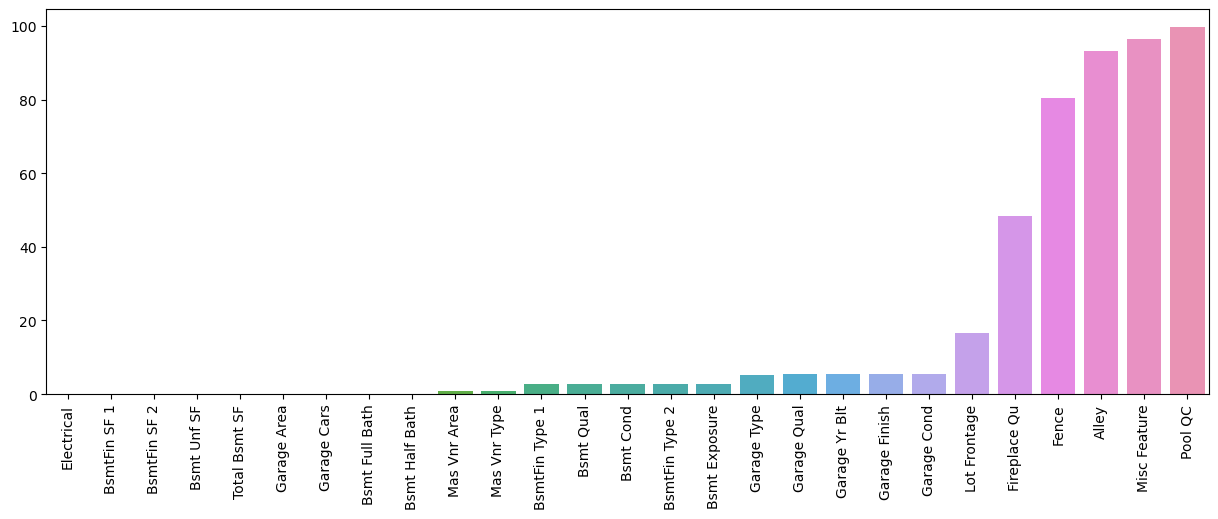

In [230]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(x = perc.index, y= perc)

plt.xticks(rotation=90);


(0.0, 1.0)

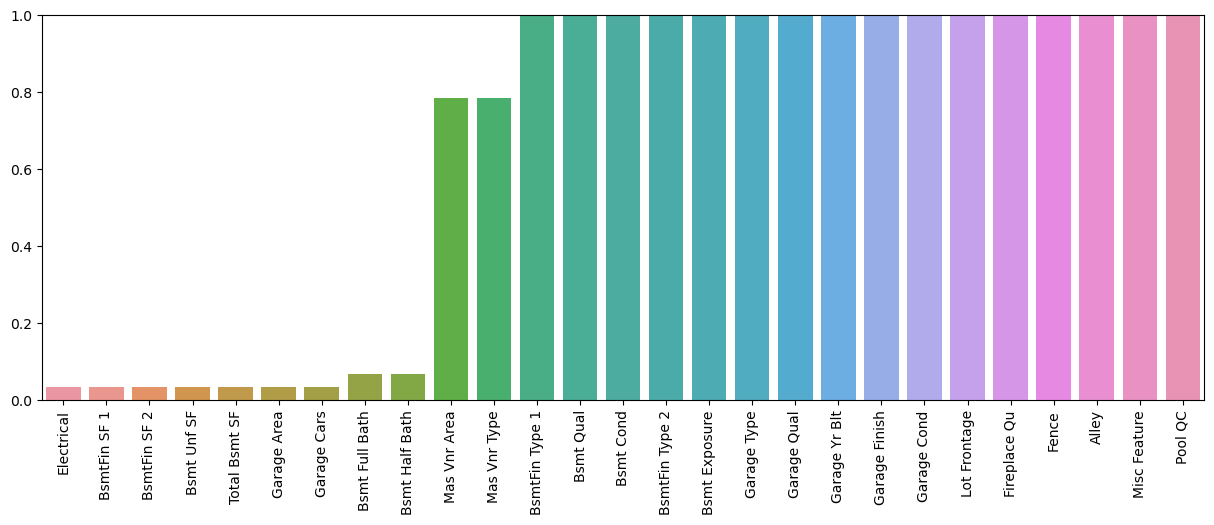

In [231]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(x = perc.index, y= perc)

plt.xticks(rotation=90);

plt.ylim(0,1)

In [234]:
df[df['Electrical'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,916386080,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [235]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

C:\Users\dania\AppData\Local\Temp\ipykernel_11728\1578357234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)


In [236]:
perc = 100 * df.isnull().sum() / len(df)
perc = perc.sort_values()
perc = perc[perc > 0 ] 
print(perc)
type(perc)

Electrical         0.034176
Garage Cars        0.034176
Garage Area        0.034176
Mas Vnr Type       0.786056
Mas Vnr Area       0.786056
BsmtFin Type 1     2.631579
Bsmt Qual          2.631579
Bsmt Cond          2.631579
BsmtFin Type 2     2.665755
Bsmt Exposure      2.734108
Garage Type        5.297334
Garage Qual        5.365687
Garage Finish      5.365687
Garage Yr Blt      5.365687
Garage Cond        5.365687
Lot Frontage      16.712235
Fireplace Qu      48.462064
Fence             80.451128
Alley             93.233083
Misc Feature      96.377307
Pool QC           99.555707
dtype: float64


pandas.core.series.Series

(0.0, 1.0)

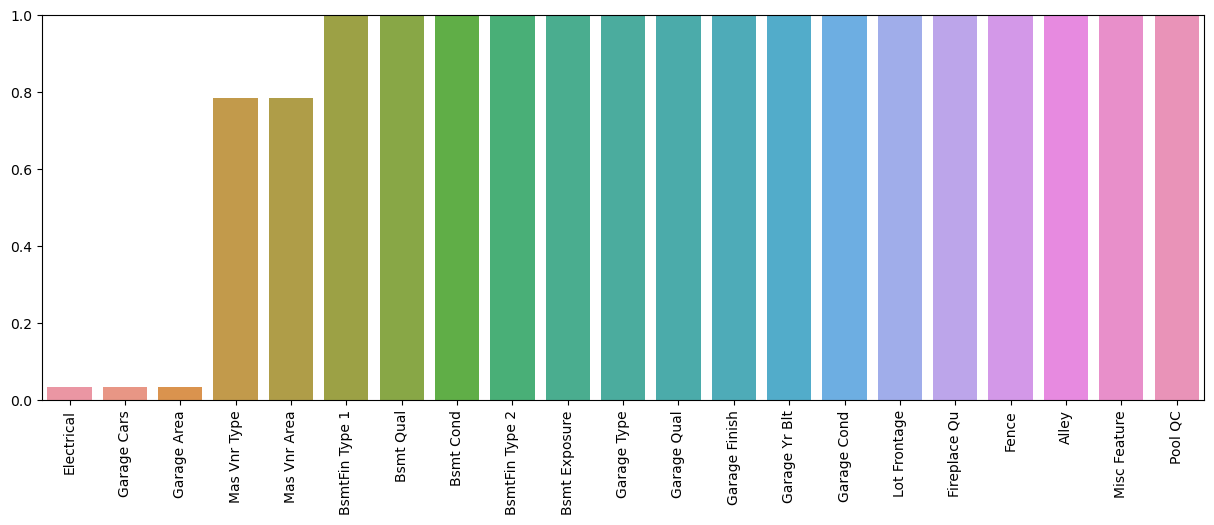

In [237]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(x = perc.index, y= perc)

plt.xticks(rotation=90);

plt.ylim(0,1)

In [238]:
perc.index

Index(['Electrical', 'Garage Cars', 'Garage Area', 'Mas Vnr Type',
       'Mas Vnr Area', 'BsmtFin Type 1', 'Bsmt Qual', 'Bsmt Cond',
       'BsmtFin Type 2', 'Bsmt Exposure', 'Garage Type', 'Garage Qual',
       'Garage Finish', 'Garage Yr Blt', 'Garage Cond', 'Lot Frontage',
       'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature', 'Pool QC'],
      dtype='object')

In [241]:
df = df.dropna(axis = 0, subset=['Electrical', 'Garage Cars'])
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [242]:
perc = 100 * df.isnull().sum() / len(df)
perc = perc.sort_values()
perc = perc[perc > 0 ] 
print(perc)
type(perc)

Mas Vnr Type       0.786594
Mas Vnr Area       0.786594
Bsmt Qual          2.633379
Bsmt Cond          2.633379
BsmtFin Type 1     2.633379
BsmtFin Type 2     2.667579
Bsmt Exposure      2.735978
Garage Type        5.300958
Garage Qual        5.335157
Garage Finish      5.335157
Garage Yr Blt      5.335157
Garage Cond        5.335157
Lot Frontage      16.723666
Fireplace Qu      48.426813
Fence             80.471956
Alley             93.228454
Misc Feature      96.374829
Pool QC           99.555404
dtype: float64


pandas.core.series.Series

(0.0, 1.0)

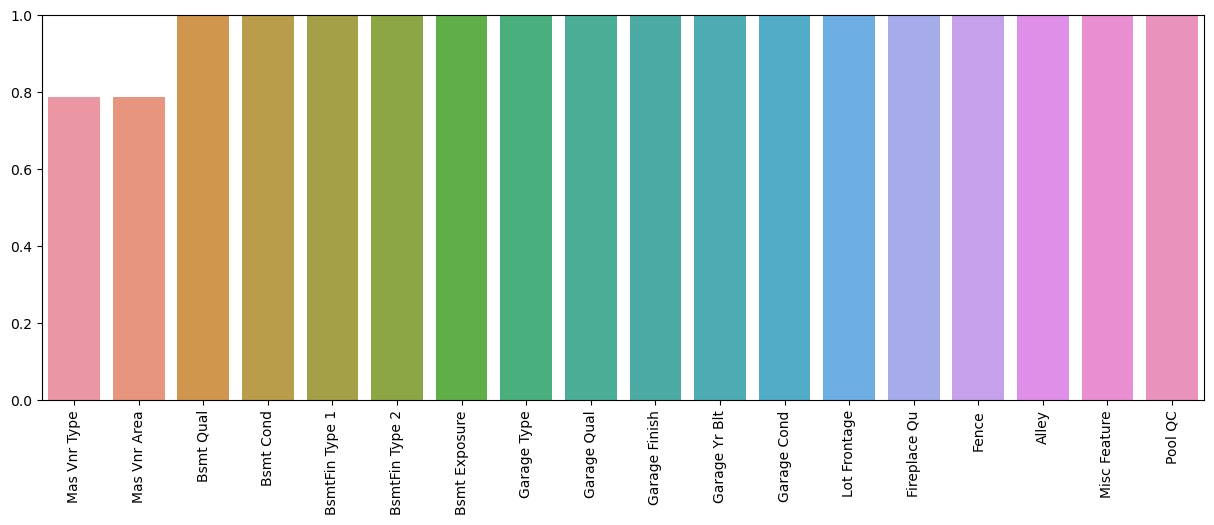

In [243]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(x = perc.index, y= perc)

plt.xticks(rotation=90);

plt.ylim(0,1)